## Yolo11 tests - visualizations of results

In [1]:
%load_ext autoreload
%autoreload 2

In [93]:
import os , sys
from pathlib import Path
cur_path = Path(os.getcwd()).parent.parent
sys.path.append(cur_path.as_posix())
# Enable plotting and make plots pretty (seaborn)
from matplotlib import pyplot as plt
import matplotlib as mpl
plt.style.use('dark_background')
import seaborn as sns
sns.set_theme(style='white')
%config InlineBackend.figure_format = 'retina'
plt.style.use('dark_background')
mpl.rcParams.update({"axes.grid" : True, "grid.color": "grey", "grid.alpha": .3})
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True

In [70]:
from octron.yolo_octron.yolo_octron import YOLO_octron
import pandas as pd

In [71]:
yolo_octron = YOLO_octron()

No models YAML path provided. Model dictionary will be empty.


In [72]:
output_dir = Path('/Users/horst/Downloads/Mouse pupil/Test/predictions/Muller_2017-01-08_videos_eye_clip_bytetrack')

In [73]:
results_dict = {}
for label, track_id, track_df_napari, features_df_napari in yolo_octron.show_predictions(save_dir = output_dir):
    print(label, track_id)
    results_dict[label] = {
        'track_id': track_id,
        'track_df_napari': track_df_napari,
        'features_df_napari': features_df_napari    
        
        
    }
    # for i, row in track_df_napari.iterrows():
    #     print(row['frame'], row['x'], row['y'])
    #     plt.imshow(row['image'])
    #     plt.scatter(row['x'], row['y'], color = 'red')
    #     plt.show()

File: /Users/horst/Downloads/Mouse pupil/Test/Muller_2017-01-08_videos_eye_clip.mp4
Codec: h264
Resolution: 211 x 145
Frame Rate: 30.0
Number of frames: 900
Duration: 30.00 seconds
Found 2 tracking CSV files
Found predictions zarr file: /Users/horst/Downloads/Mouse pupil/Test/predictions/Muller_2017-01-08_videos_eye_clip_bytetrack/predictions.zarr
Existing keys in zarr archive: ['2_masks', '1_masks']
eye 2
pupil 2


In [74]:
results_dict.keys()

dict_keys(['eye', 'pupil'])

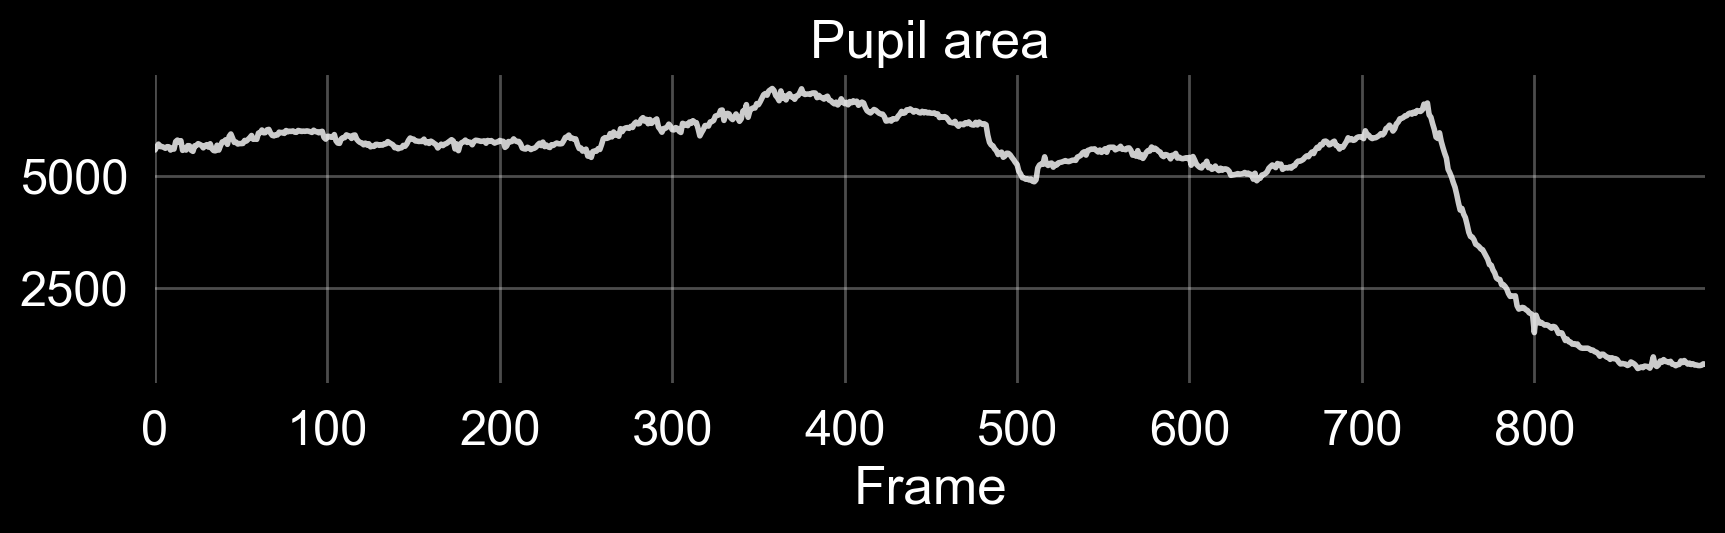

In [96]:
sns.set_theme(font_scale=1.6)
plt.style.use('dark_background')
figure = plt.figure(figsize=(10, 2))
ax = figure.add_subplot(1, 1, 1)
frames = results_dict['pupil']['track_df_napari']['frame']
pupil_area = results_dict['pupil']['features_df_napari']['area']  
ax.plot(frames, pupil_area, label = 'pupil', color = 'w', alpha = 0.8, lw=2)
ax.set_xlim([frames.min(), frames.max()])
ax.set_title('Pupil area')  
ax.set_xlabel('Frame')
sns.despine(left=True, bottom=True)


[]

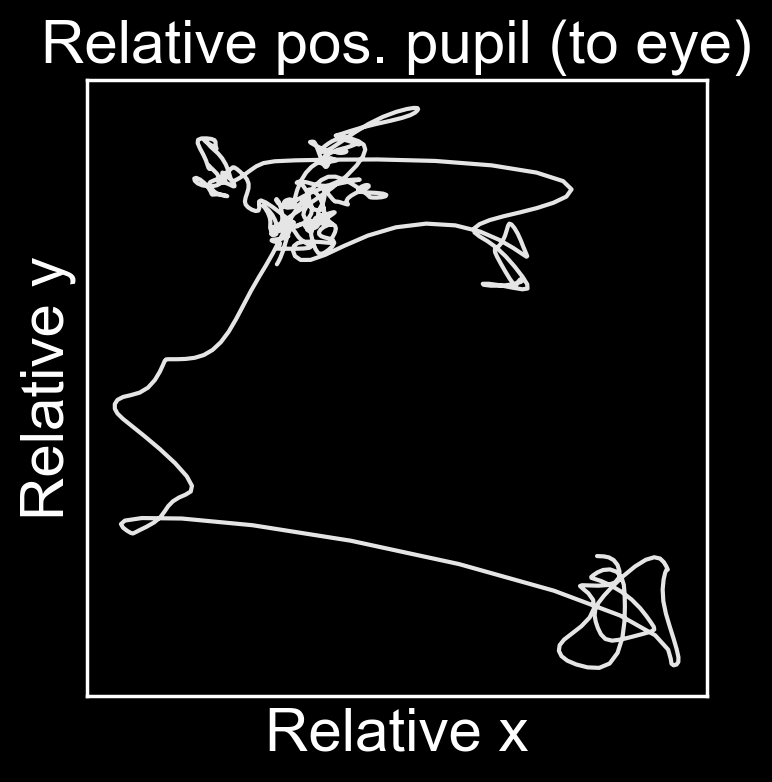

In [95]:
# relative movment eye vs. pupil
figure = plt.figure(figsize=(4,4))
ax = figure.add_subplot(1, 1, 1)
sns.set_theme(font_scale=1.8)
plt.style.use('dark_background')
frames = results_dict['eye']['track_df_napari']['frame']
eye_x = results_dict['eye']['track_df_napari']['pos_x']
eye_y = results_dict['eye']['track_df_napari']['pos_y']
pupil_x = results_dict['pupil']['track_df_napari']['pos_x']
pupil_y = results_dict['pupil']['track_df_napari']['pos_y']

# Relative movement
relative_x = pupil_x - eye_x
relative_y = pupil_y - eye_y
# Plotting
ax.plot(relative_x, relative_y, label = 'movement xy', color = 'w', alpha = 0.9)
ax.set_title('Relative pos. pupil (to eye)')
ax.set_xlabel('Relative x')
ax.set_ylabel('Relative y') 
ax.set_xticks([])
ax.set_yticks([])

In [48]:
len(results_dict['pupil']['track_df_napari']), len(results_dict['pupil']['features_df_napari'])

(900, 900)

In [ ]:
### Make little cute figure of eye / pupil results

In [10]:
# # Load a single csv file for visualization
# csv_pupil = pd.read_csv(
#     output_dir /'pupil_track_2.csv'
# )
# csv_eye = pd.read_csv(
#     output_dir /'eye_track_1.csv'
# )